In [2]:
#libaries Ill be using for this project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# import seaborn as sns
#NBA_API
from nba_api.stats.endpoints import playercareerstats, commonplayerinfo, shotchartdetail, teamgamelog, boxscoreadvancedv2, leaguedashplayerstats, leaguedashteamstats
from nba_api.stats.static import *

#Basketball Reference API
from basketball_reference_web_scraper import client

#functions used in this file
from SGA_functions import *


## Player Analysis 
- **Name**: Shai Gilgeous-Alexander 
- **Position**: PG / SG
- **Height**: 6'6 
- **Weight**: 195 lbs
- **College**: Kentucky
- **Draft Year**: 2018 (Round 1 pick 11)
- **Country**: Canada

## Introduction
This notebook provides a detailed analysis of Shai Gilgeous-Alexander's performance throughout his NBA career. We will examine each season individually and then compare his progress over the years.



In [3]:
#player info and player ID
player_id = players.find_players_by_full_name('shai gilgeous-alexander')[0]['id']
player_name = 'Shai Gilgeous-Alexander'
seasons = ['2018-19', '2019-20', '2020-21', '2021-22', '2022-23','2023-24']
player_info = commonplayerinfo.CommonPlayerInfo(player_id=player_id).get_data_frames()[0]

In [4]:
#player career stats
data = playercareerstats.PlayerCareerStats(player_id=player_id).get_data_frames()[0]
data.describe()

,PLAYER_ID,TEAM_ID,PLAYER_AGE,GP,GS,MIN,FGM,FGA,FG_PCT,FG3M,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
count,6.0,6.000000e+00,6.000000,6.000000,6.000000,6.00000,6.000000,6.00000,6.000000,6.000000,...,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
mean,1628983.0,1.610613e+09,22.500000,64.333333,62.833333,2115.50000,513.833333,1036.00000,0.492167,75.166667,...,0.834000,47.333333,258.000000,305.333333,312.666667,89.166667,48.833333,148.166667,146.666667,1468.333333
std,0.0,5.715476e+00,1.870829,16.741167,15.171245,507.55246,199.873377,359.82329,0.030486,18.004629,...,0.044222,17.037214,88.944927,99.502094,96.371503,41.392834,16.030180,28.902710,46.970913,605.499353
min,1628983.0,1.610613e+09,20.000000,35.000000,35.000000,1180.00000,287.000000,565.00000,0.453000,51.000000,...,0.800000,19.000000,147.000000,166.000000,207.000000,27.000000,23.000000,106.000000,70.000000,830.000000
25%,1628983.0,1.610613e+09,21.250000,59.000000,59.000000,2000.00000,375.000000,790.75000,0.472250,61.250000,...,0.807250,39.500000,191.500000,243.500000,241.500000,73.000000,45.250000,135.750000,123.250000,999.500000
50%,1628983.0,1.610613e+09,22.500000,69.000000,69.000000,2295.00000,477.500000,1033.50000,0.492000,79.000000,...,0.809000,52.000000,255.500000,303.500000,300.500000,87.500000,46.500000,147.500000,158.500000,1351.000000
75%,1628983.0,1.610613e+09,23.750000,73.750000,72.250000,2425.00000,647.500000,1298.75000,0.509500,88.500000,...,0.858000,58.500000,330.000000,391.250000,361.000000,108.000000,60.500000,160.000000,181.750000,1944.000000
max,1628983.0,1.610613e+09,25.000000,82.000000,75.000000,2553.00000,796.000000,1487.00000,0.535000,95.000000,...,0.905000,65.000000,365.000000,415.000000,465.000000,150.000000,67.000000,192.000000,192.000000,2254.000000


# **2018-2019**

In [5]:
#Rookie year stats
first_year = data.loc[data['SEASON_ID'] == '2018-19']

#Team ID
clippers_id = '1610612746'
first_year_team_stats = teamgamelog.TeamGameLog(team_id=clippers_id, season='2018-19').get_data_frames()[0]
first_year_game_id = first_year_team_stats['Game_ID']

#check data
first_year

,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
0,1628983,2018-19,00,1610612746,LAC,20.0,82,73,2174.0,341,...,0.8,57,175,232,270,96,45,141,175,889


In [6]:
#2018-2019 stats
data_2019 = get_players_stats(player_id=player_id,season='2018-19')

print(f"{player_name} {seasons[0]} Averages")
print(
f"""PPG: {data_2019['PPG']}
RPG: {data_2019['RPG']}
APG: {data_2019['APG']}
SPG: {data_2019['SPG']}
BPG: {data_2019['BPG']}
MPG: {data_2019['MPG']}
GP: {data_2019['GP']}
"""
)

Shai Gilgeous-Alexander 2018-19 Averages
PPG: 10.84
RPG: 2.83
APG: 3.29
SPG: 1.17
BPG: 0.55
MPG: 26.51
GP: 82



### Advanced Metrics Analysis for 2018-2019

In [7]:
BR_2019 = basketball_reference_adv_data('2019')

get_BR_avgs(BR_2019)

Shai Gilgeous-Alexander Averages

player_efficiency_rating: 13.4
true_shooting_percentage: 0.554
win_shares: 3.3
offensive_box_plus_minus: -0.9
defensive_box_plus_minus: 0.4
box_plus_minus: -0.5


In [8]:
league_BR_stats('2019')

The Leagues Advance Metrics Averages

player_efficiency_rating: 12.81
true_shooting_percentage: 0.53
win_shares: 2.0
offensive_box_plus_minus: -1.46
defensive_box_plus_minus: -0.35
box_plus_minus: -1.82


Visualizing Player Shots on an NBA Court

Using the guide from [Savvas Tjortjoglou's blog](http://savvastjortjoglou.com/nba-shot-sharts.html), I was able to construct an NBA court diagram to display player shots.

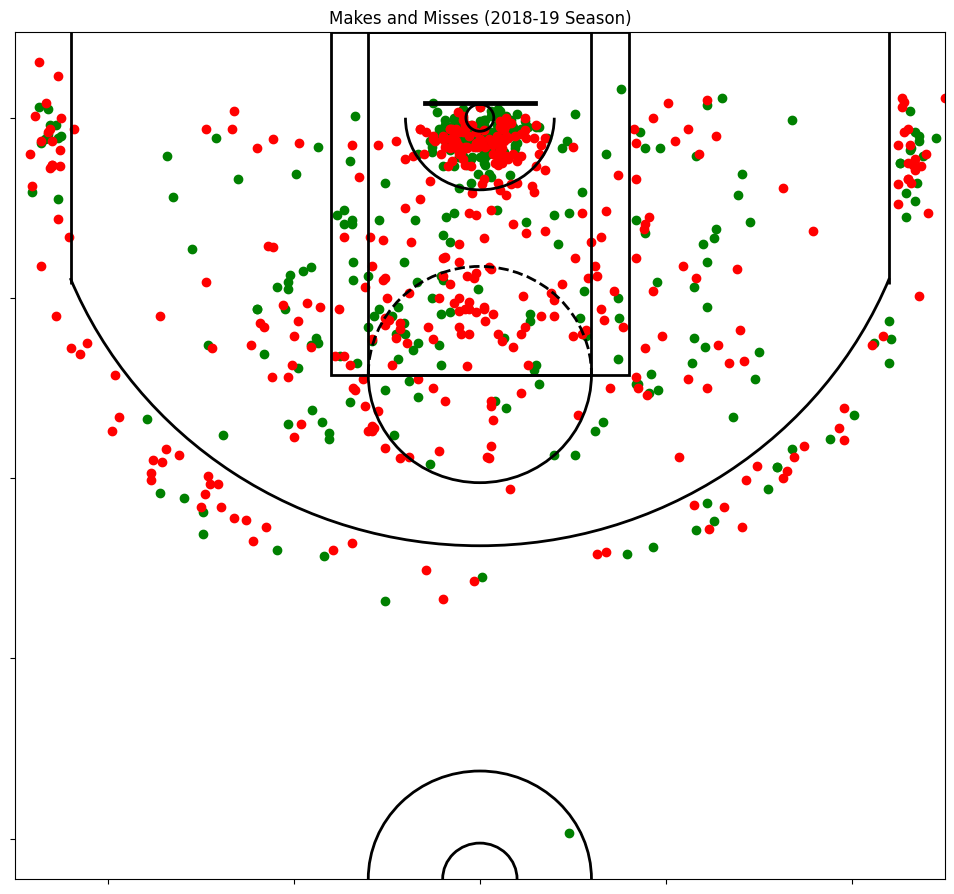

In [9]:
shot_chart_2019 = get_shot_chart(player_id=player_id,year='2018-19')

#track shots made of miss
made_shots = shot_chart_2019[shot_chart_2019['SHOT_MADE_FLAG'] == 1]
missed_shots = shot_chart_2019[shot_chart_2019['SHOT_MADE_FLAG'] == 0]

plt.figure(figsize=(12,11))
plt.title('Makes and Misses (2018-19 Season)')
plt.scatter(made_shots['LOC_X'], made_shots['LOC_Y'], color='green', label='Made Shots')
plt.scatter(missed_shots['LOC_X'], missed_shots['LOC_Y'], color='red', label='Missed Shots')
draw_court()
plt.xlim(-250,250)
plt.ylim(422.5, -47.5)
plt.tick_params(labelbottom=False, labelleft=False)
plt.show()

### Shot Attempts and Outcomes (2019)
This data displays the shot attempts and outcomes (both makes and misses) from various ranges on the court.

In [10]:
range_of_shot_2019 = shot_chart_2019.groupby(['SHOT_ZONE_RANGE', 'SHOT_MADE_FLAG']).size().reset_index(name='Shot Count')
range_of_shot_2019

,SHOT_ZONE_RANGE,SHOT_MADE_FLAG,Shot Count
0,16-24 ft.,0,45
1,16-24 ft.,1,35
2,24+ ft.,0,86
3,24+ ft.,1,51
4,8-16 ft.,0,115
5,8-16 ft.,1,80
6,Back Court Shot,0,1
7,Less Than 8 ft.,0,128
8,Less Than 8 ft.,1,175


### Top 5 Action Types for 2018-2019
This data displays the types of actions Shai Gilgeous-Alexander used to score.


In [11]:
action_type = shot_chart_2019.groupby(['ACTION_TYPE']).size().sort_values(ascending=False).head(5)
action_type

ACTION_TYPE
Jump Shot              170
Pullup Jump shot       166
Driving Layup Shot      97
Running Layup Shot      45
Step Back Jump shot     28
dtype: int64

# **2019-2020**

In [12]:
#Data for second year
second_year = data.loc[data['SEASON_ID'] == '2019-20']

#check data
second_year

,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
1,1628983,2019-20,00,1610612760,OKC,21.0,70,70,2428.0,478,...,0.807,47,365,412,232,79,47,134,117,1331


In [13]:
#averages for the data
data_2020 = calculate_per_game_totals(second_year)
print("Averages")
print(
f"""PPG: {data_2020['PPG']}
RPG: {data_2020['RPG']}
APG: {data_2020['APG']}
SPG: {data_2020['SPG']}
BPG: {data_2020['BPG']}
MPG: {data_2020['MPG']}
GP: {data_2020['GP']}
"""
)

Averages
PPG: 19.01
RPG: 5.89
APG: 3.31
SPG: 1.13
BPG: 0.67
MPG: 34.69
GP: 70



### Advance Metrics for 2019-2020

In [14]:
BR_2020 = basketball_reference_adv_data('2020')

get_BR_avgs(BR_2020)

Shai Gilgeous-Alexander Averages

player_efficiency_rating: 17.7
true_shooting_percentage: 0.568
win_shares: 6.1
offensive_box_plus_minus: 1.3
defensive_box_plus_minus: 0.4
box_plus_minus: 1.7


In [15]:
league_BR_stats('2020')

The Leagues Advance Metrics Averages

player_efficiency_rating: 12.8
true_shooting_percentage: 0.54
win_shares: 1.82
offensive_box_plus_minus: -1.5
defensive_box_plus_minus: -0.23
box_plus_minus: -1.74


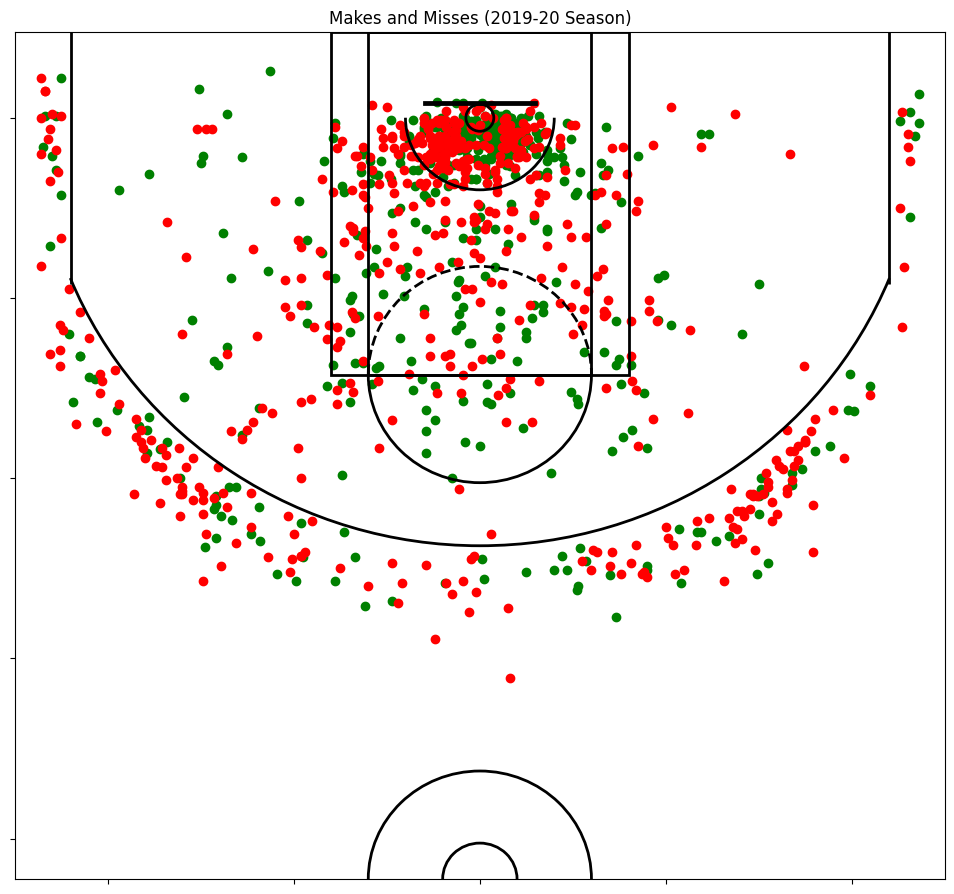

In [16]:
shot_chart_2020 = get_shot_chart(player_id=player_id,year='2019-20')

#track shots made of miss
made_shots = shot_chart_2020[shot_chart_2020['SHOT_MADE_FLAG'] == 1]
missed_shots = shot_chart_2020[shot_chart_2020['SHOT_MADE_FLAG'] == 0]

plt.figure(figsize=(12,11))
plt.title(f'Makes and Misses ({seasons[1]} Season)')
plt.scatter(made_shots['LOC_X'], made_shots['LOC_Y'], color='green', label='Made Shots')
plt.scatter(missed_shots['LOC_X'], missed_shots['LOC_Y'], color='red', label='Missed Shots')
draw_court()
plt.xlim(-250,250)
plt.ylim(422.5, -47.5)
plt.tick_params(labelbottom=False, labelleft=False)
plt.show()

### Shot Attempts and Outcomes (2019-2020)
This data displays the shot attempts and outcomes (both makes and misses) from various ranges on the court.

In [17]:
range_of_shot_2020 = shot_chart_2020.groupby(['SHOT_ZONE_RANGE','SHOT_MADE_FLAG']).size().reset_index(name='Shot Count')
range_of_shot_2020

,SHOT_ZONE_RANGE,SHOT_MADE_FLAG,Shot Count
0,16-24 ft.,0,34
1,16-24 ft.,1,33
2,24+ ft.,0,164
3,24+ ft.,1,87
4,8-16 ft.,0,99
5,8-16 ft.,1,87
6,Less Than 8 ft.,0,240
7,Less Than 8 ft.,1,271


### Top 5 Action Types for 2019-2020
This data displays the types of actions Shai Gilgeous-Alexander used to score.


In [18]:
action_type_2020 = shot_chart_2020.groupby(['ACTION_TYPE']).size().sort_values(ascending=False).head(5)
action_type_2020

ACTION_TYPE
Driving Layup Shot            211
Jump Shot                     157
Pullup Jump shot              140
Step Back Jump shot            97
Driving Floating Jump Shot     78
dtype: int64

# **2020-2021**

In [19]:
#Data for third year
third_year = data.loc[data['SEASON_ID'] == '2020-21']

#check data
third_year

,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
2,1628983,2020-21,00,1610612760,OKC,22.0,35,35,1180.0,287,...,0.808,19,147,166,207,27,23,106,70,830


As we can see Shai didnt play much in 2020-2021 due to injures

In [20]:
#averages for the data
data_2021 = calculate_per_game_totals(third_year)
print("Averages")
print(
f"""PPG: {data_2021['PPG']}
RPG: {data_2021['RPG']}
APG: {data_2021['APG']}
SPG: {data_2021['SPG']}
BPG: {data_2021['BPG']}
MPG: {data_2021['MPG']}
GP: {data_2021['GP']}
"""
)

Averages
PPG: 23.71
RPG: 4.74
APG: 5.91
SPG: 0.77
BPG: 0.66
MPG: 33.71
GP: 35



### Advance Metrics for 2020-2021

In [21]:
BR_2021 = basketball_reference_adv_data('2021')

get_BR_avgs(BR_2021)
print('\n')
league_BR_stats('2021')

Shai Gilgeous-Alexander Averages

player_efficiency_rating: 21.6
true_shooting_percentage: 0.623
win_shares: 3.5
offensive_box_plus_minus: 3.9
defensive_box_plus_minus: 0.2
box_plus_minus: 4.1


The Leagues Advance Metrics Averages

player_efficiency_rating: 12.64
true_shooting_percentage: 0.54
win_shares: 1.76
offensive_box_plus_minus: -1.72
defensive_box_plus_minus: -0.18
box_plus_minus: -1.9


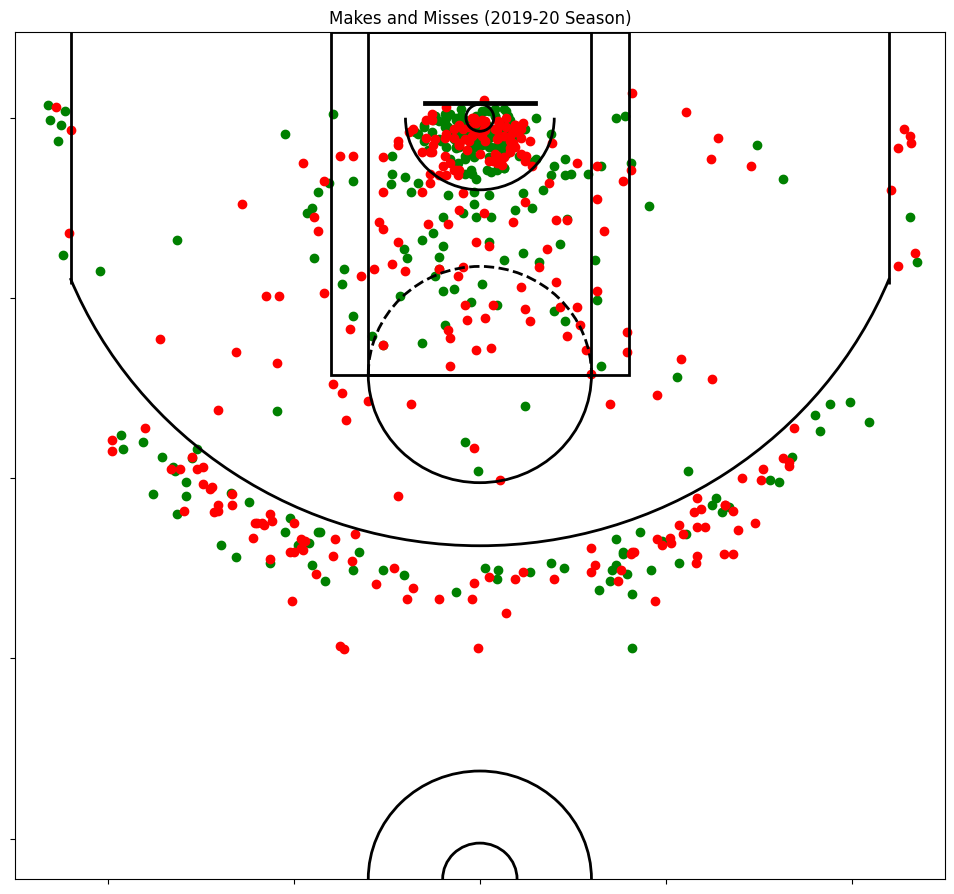

In [22]:
shot_chart_2021 = get_shot_chart(player_id=player_id,year='2020-21')

#track shots made of miss
made_shots = shot_chart_2021[shot_chart_2021['SHOT_MADE_FLAG'] == 1]
missed_shots = shot_chart_2021[shot_chart_2021['SHOT_MADE_FLAG'] == 0]

plt.figure(figsize=(12,11))
plt.title(f'Makes and Misses ({seasons[1]} Season)')
plt.scatter(made_shots['LOC_X'], made_shots['LOC_Y'], color='green', label='Made Shots')
plt.scatter(missed_shots['LOC_X'], missed_shots['LOC_Y'], color='red', label='Missed Shots')
draw_court()
plt.xlim(-250,250)
plt.ylim(422.5, -47.5)
plt.tick_params(labelbottom=False, labelleft=False)
plt.show()

### Shot Attempts and Outcomes (2020-2021)
This data displays the shot attempts and outcomes (both makes and misses) from various ranges on the court.

In [23]:
range_of_shot_2021 = shot_chart_2021.groupby(['SHOT_ZONE_RANGE','SHOT_MADE_FLAG']).size().reset_index(name='Shot Count')
range_of_shot_2021

,SHOT_ZONE_RANGE,SHOT_MADE_FLAG,Shot Count
0,16-24 ft.,0,16
1,16-24 ft.,1,9
2,24+ ft.,0,99
3,24+ ft.,1,71
4,8-16 ft.,0,51
5,8-16 ft.,1,35
6,Less Than 8 ft.,0,112
7,Less Than 8 ft.,1,172


### Top 5 Action Types for 2020-2021
This data displays the types of actions Shai Gilgeous-Alexander used to score.


In [24]:
action_type_2021 = shot_chart_2021.groupby(['ACTION_TYPE']).size().sort_values(ascending=False).head(5)
action_type_2021

ACTION_TYPE
Driving Layup Shot                141
Pullup Jump shot                  114
Step Back Jump shot                74
Jump Shot                          59
Driving Finger Roll Layup Shot     32
dtype: int64

# **2021-2022**

In [25]:
#Data for third year
fourth_year = data.loc[data['SEASON_ID'] == '2021-22']

#check data
fourth_year

,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
3,1628983,2021-22,00,1610612760,OKC,23.0,56,56,1942.0,477,...,0.81,37,241,278,331,71,46,154,142,1371


In [26]:
#averages for the data
data_2022 = calculate_per_game_totals(fourth_year)
print("Averages")
print(
f"""PPG: {data_2022['PPG']}
RPG: {data_2022['RPG']}
APG: {data_2022['APG']}
SPG: {data_2022['SPG']}
BPG: {data_2022['BPG']}
MPG: {data_2022['MPG']}
GP: {data_2022['GP']}
"""
)

Averages
PPG: 24.48
RPG: 4.96
APG: 5.91
SPG: 1.27
BPG: 0.82
MPG: 34.68
GP: 56



### Advance Metrics for 2021-2022

In [27]:
BR_2022 = basketball_reference_adv_data('2022')

get_BR_avgs(BR_2022)
print('\n')
league_BR_stats('2022')

Shai Gilgeous-Alexander Averages

player_efficiency_rating: 20.9
true_shooting_percentage: 0.557
win_shares: 4.6
offensive_box_plus_minus: 2.9
defensive_box_plus_minus: 0.5
box_plus_minus: 3.4


The Leagues Advance Metrics Averages

player_efficiency_rating: 12.26
true_shooting_percentage: 0.52
win_shares: 1.76
offensive_box_plus_minus: -1.99
defensive_box_plus_minus: -0.37
box_plus_minus: -2.35


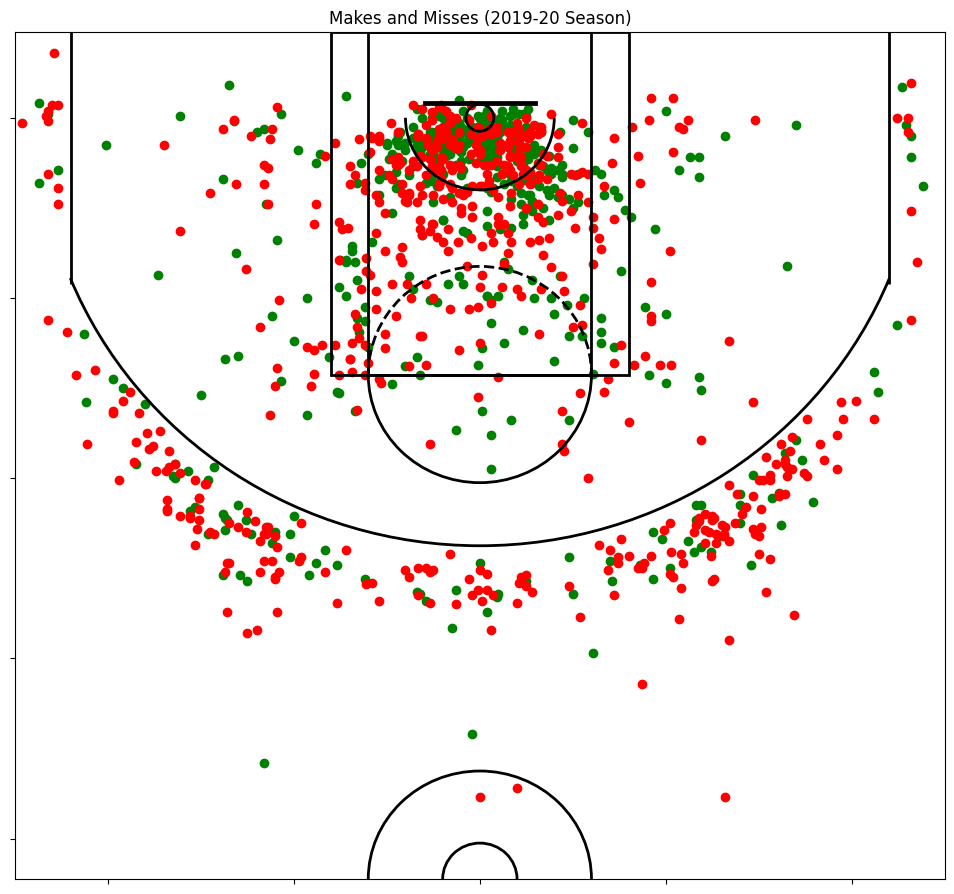

In [28]:
shot_chart_2022 = get_shot_chart(player_id=player_id,year='2021-22')

#track shots made of miss
made_shots = shot_chart_2022[shot_chart_2022['SHOT_MADE_FLAG'] == 1]
missed_shots = shot_chart_2022[shot_chart_2022['SHOT_MADE_FLAG'] == 0]

plt.figure(figsize=(12,11))
plt.title(f'Makes and Misses ({seasons[1]} Season)')
plt.scatter(made_shots['LOC_X'], made_shots['LOC_Y'], color='green', label='Made Shots')
plt.scatter(missed_shots['LOC_X'], missed_shots['LOC_Y'], color='red', label='Missed Shots')
draw_court()
plt.xlim(-250,250)
plt.ylim(422.5, -47.5)
plt.tick_params(labelbottom=False, labelleft=False)
plt.show()

### Shot Attempts and Outcomes (2021-2022)
This data displays the shot attempts and outcomes (both makes and misses) from various ranges on the court.

In [29]:
range_of_shot_2022 = shot_chart_2022.groupby(['SHOT_ZONE_RANGE','SHOT_MADE_FLAG']).size().reset_index(name='Shot Count')
range_of_shot_2022

,SHOT_ZONE_RANGE,SHOT_MADE_FLAG,Shot Count
0,16-24 ft.,0,25
1,16-24 ft.,1,23
2,24+ ft.,0,208
3,24+ ft.,1,89
4,8-16 ft.,0,108
5,8-16 ft.,1,82
6,Less Than 8 ft.,0,234
7,Less Than 8 ft.,1,283


### Top 5 Action Types for 2021-2022
This data displays the types of actions Shai Gilgeous-Alexander used to score.

In [30]:
action_type_2022 = shot_chart_2022.groupby(['ACTION_TYPE']).size().sort_values(ascending=False).head(5)
action_type_2022

ACTION_TYPE
Driving Layup Shot                213
Step Back Jump shot               207
Pullup Jump shot                  154
Jump Shot                          91
Driving Finger Roll Layup Shot     87
dtype: int64

# **2022-2023**

In [31]:
#Data for fifth year
fifth_year = data.loc[data['SEASON_ID'] == '2022-23']

#check data
fifth_year

,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
4,1628983,2022-23,00,1610612760,OKC,24.0,68,68,2416.0,704,...,0.905,59,270,329,371,112,65,192,192,2135


In [32]:
#averages for the data
data_2023 = calculate_per_game_totals(fifth_year)
print("Averages")
print(
f"""PPG: {data_2023['PPG']}
RPG: {data_2023['RPG']}
APG: {data_2023['APG']}
SPG: {data_2023['SPG']}
BPG: {data_2023['BPG']}
MPG: {data_2023['MPG']}
GP: {data_2023['GP']}
"""
)

Averages
PPG: 31.4
RPG: 4.84
APG: 5.46
SPG: 1.65
BPG: 0.96
MPG: 35.53
GP: 68



### Advance Metrics for 2022-2023

In [33]:
BR_2023 = basketball_reference_adv_data('2023')

get_BR_avgs(BR_2023)
print('\n')
league_BR_stats('2023')

Shai Gilgeous-Alexander Averages

player_efficiency_rating: 27.2
true_shooting_percentage: 0.626
win_shares: 11.4
offensive_box_plus_minus: 5.7
defensive_box_plus_minus: 1.5
box_plus_minus: 7.3


The Leagues Advance Metrics Averages

player_efficiency_rating: 13.26
true_shooting_percentage: 0.56
win_shares: 2.07
offensive_box_plus_minus: -1.37
defensive_box_plus_minus: -0.08
box_plus_minus: -1.45


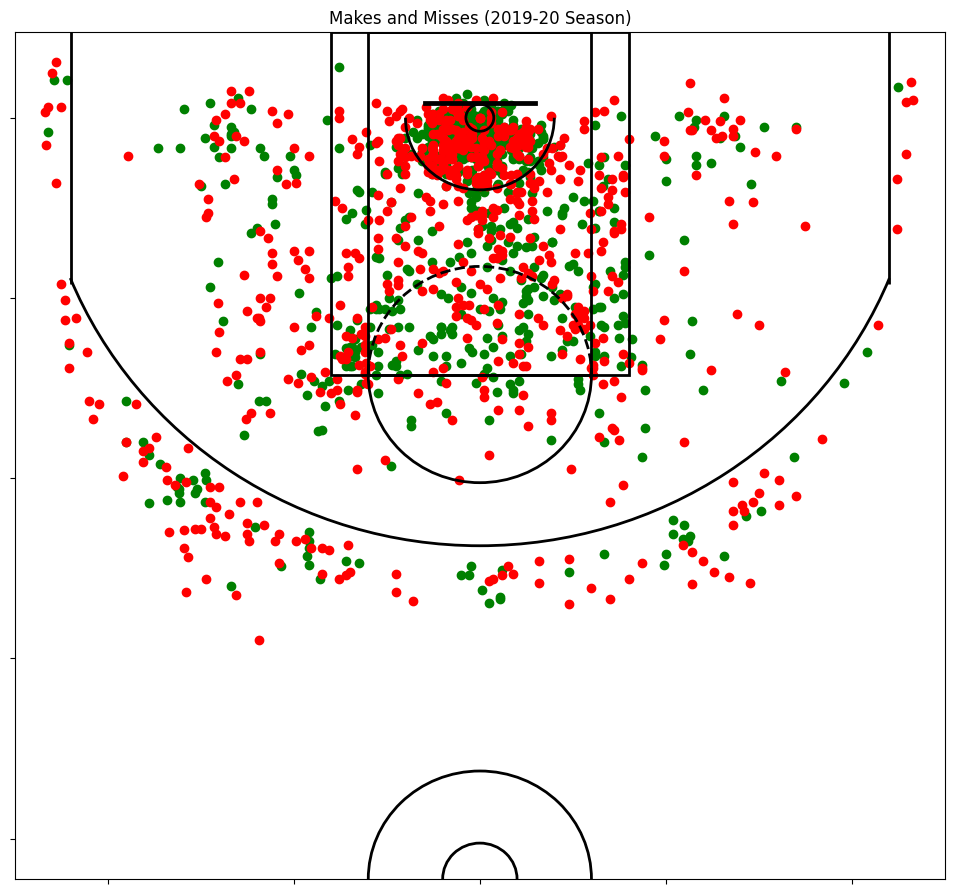

In [34]:
shot_chart_2023 = get_shot_chart(player_id=player_id,year='2022-23')

#track shots made of miss
made_shots = shot_chart_2023[shot_chart_2023['SHOT_MADE_FLAG'] == 1]
missed_shots = shot_chart_2023[shot_chart_2023['SHOT_MADE_FLAG'] == 0]

plt.figure(figsize=(12,11))
plt.title(f'Makes and Misses ({seasons[1]} Season)')
plt.scatter(made_shots['LOC_X'], made_shots['LOC_Y'], color='green', label='Made Shots')
plt.scatter(missed_shots['LOC_X'], missed_shots['LOC_Y'], color='red', label='Missed Shots')
draw_court()
plt.xlim(-250,250)
plt.ylim(422.5, -47.5)
plt.tick_params(labelbottom=False, labelleft=False)
plt.show()

### Shot Attempts and Outcomes (2022-2023)
This data displays the shot attempts and outcomes (both makes and misses) from various ranges on the court.

In [35]:
range_of_shot_2023 = shot_chart_2023.groupby(['SHOT_ZONE_RANGE','SHOT_MADE_FLAG']).size().reset_index(name='Shot Count')
range_of_shot_2023

,SHOT_ZONE_RANGE,SHOT_MADE_FLAG,Shot Count
0,16-24 ft.,0,60
1,16-24 ft.,1,40
2,24+ ft.,0,109
3,24+ ft.,1,58
4,8-16 ft.,0,215
5,8-16 ft.,1,208
6,Back Court Shot,0,1
7,Less Than 8 ft.,0,292
8,Less Than 8 ft.,1,398


### Top 5 Action Types for 2022-2023
This data displays the types of actions Shai Gilgeous-Alexander used to score.

In [36]:
action_type_2023 = shot_chart_2023.groupby(['ACTION_TYPE']).size().sort_values(ascending=False).head(5)
action_type_2023

ACTION_TYPE
Pullup Jump shot                  249
Driving Layup Shot                241
Step Back Jump shot               204
Driving Finger Roll Layup Shot     75
Fadeaway Jump Shot                 69
dtype: int64

# **2023-2024**

In [37]:
#Data for sixth
sixth_year = data.loc[data['SEASON_ID'] == '2023-24']

#check data
sixth_year

,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
5,1628983,2023-24,00,1610612760,OKC,25.0,75,75,2553.0,796,...,0.874,65,350,415,465,150,67,162,184,2254


In [38]:
#averages for the data
data_2024 = calculate_per_game_totals(sixth_year)
print("Averages")
print(
f"""PPG: {data_2024['PPG']}
RPG: {data_2024['RPG']}
APG: {data_2024['APG']}
SPG: {data_2024['SPG']}
BPG: {data_2024['BPG']}
MPG: {data_2024['MPG']}
GP: {data_2024['GP']}
"""
)

Averages
PPG: 30.05
RPG: 5.53
APG: 6.2
SPG: 2.0
BPG: 0.89
MPG: 34.04
GP: 75



### Advance Metrics for 2023-2024

In [40]:
BR_2024 = basketball_reference_adv_data('2024')

get_BR_avgs(BR_2024)
print('\n')
league_BR_stats('2024')

Shai Gilgeous-Alexander Averages

player_efficiency_rating: 29.3
true_shooting_percentage: 0.636
win_shares: 14.6
offensive_box_plus_minus: 6.7
defensive_box_plus_minus: 2.3
box_plus_minus: 9.0


The Leagues Advance Metrics Averages

player_efficiency_rating: 12.43
true_shooting_percentage: 0.54
win_shares: 1.92
offensive_box_plus_minus: -1.83
defensive_box_plus_minus: -0.18
box_plus_minus: -2.01


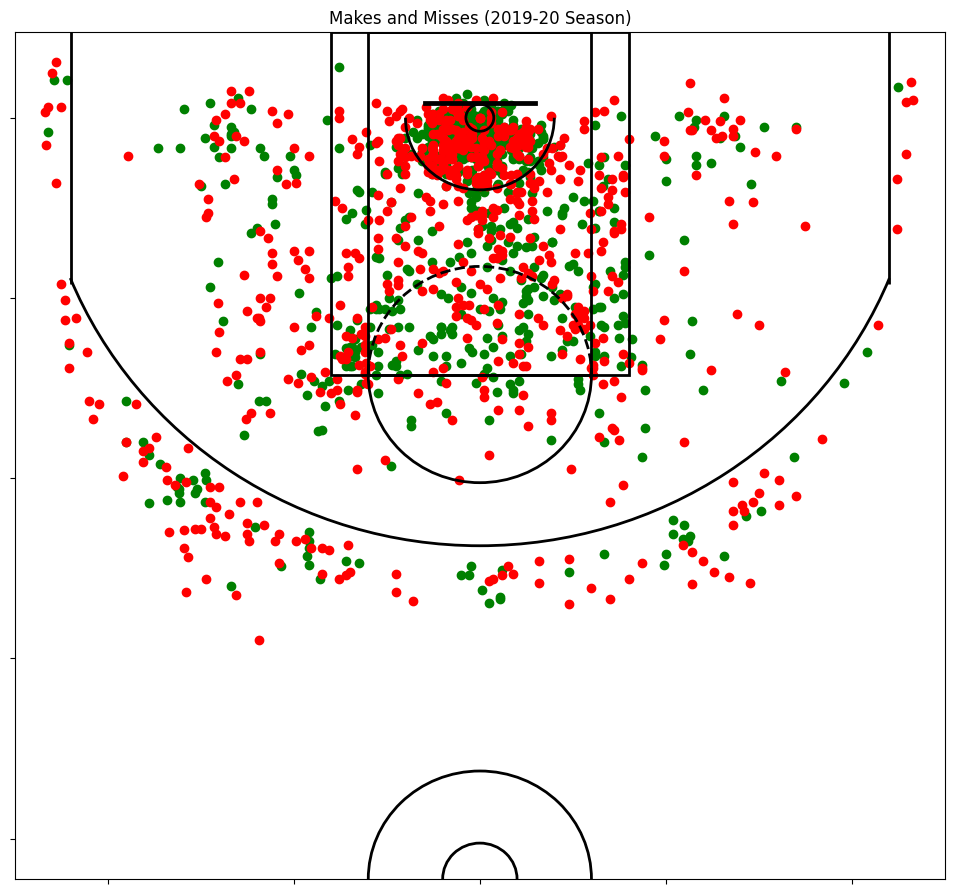

In [41]:
shot_chart_2024 = get_shot_chart(player_id=player_id,year='2023-24')

#track shots made of miss
made_shots = shot_chart_2023[shot_chart_2023['SHOT_MADE_FLAG'] == 1]
missed_shots = shot_chart_2023[shot_chart_2023['SHOT_MADE_FLAG'] == 0]

plt.figure(figsize=(12,11))
plt.title(f'Makes and Misses ({seasons[1]} Season)')
plt.scatter(made_shots['LOC_X'], made_shots['LOC_Y'], color='green', label='Made Shots')
plt.scatter(missed_shots['LOC_X'], missed_shots['LOC_Y'], color='red', label='Missed Shots')
draw_court()
plt.xlim(-250,250)
plt.ylim(422.5, -47.5)
plt.tick_params(labelbottom=False, labelleft=False)
plt.show()

In [42]:
range_of_shot_2024 = shot_chart_2024.groupby(['SHOT_ZONE_RANGE','SHOT_MADE_FLAG']).size().reset_index(name='Shot Count')
range_of_shot_2024

,SHOT_ZONE_RANGE,SHOT_MADE_FLAG,Shot Count
0,16-24 ft.,0,65
1,16-24 ft.,1,58
2,24+ ft.,0,174
3,24+ ft.,1,95
4,8-16 ft.,0,223
5,8-16 ft.,1,249
6,Less Than 8 ft.,0,229
7,Less Than 8 ft.,1,394


In [43]:
action_type_2024 = shot_chart_2024.groupby(['ACTION_TYPE']).size().sort_values(ascending=False).head(5)
action_type_2024

ACTION_TYPE
Pullup Jump shot                  262
Step Back Jump shot               260
Driving Layup Shot                206
Driving Finger Roll Layup Shot     97
Fadeaway Jump Shot                 95
dtype: int64